In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,r2_score,roc_auc_score,roc_curve,precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [2]:
df = pd.read_csv(r"C:\Users\ThinkPad\Downloads\Loan_Data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [6]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df = df.drop(columns='Loan_ID', axis=1)

array([[<Axes: title={'center': 'ApplicantIncome'}>,
        <Axes: title={'center': 'CoapplicantIncome'}>],
       [<Axes: title={'center': 'LoanAmount'}>,
        <Axes: title={'center': 'Loan_Amount_Term'}>],
       [<Axes: title={'center': 'Credit_History'}>, <Axes: >]],
      dtype=object)

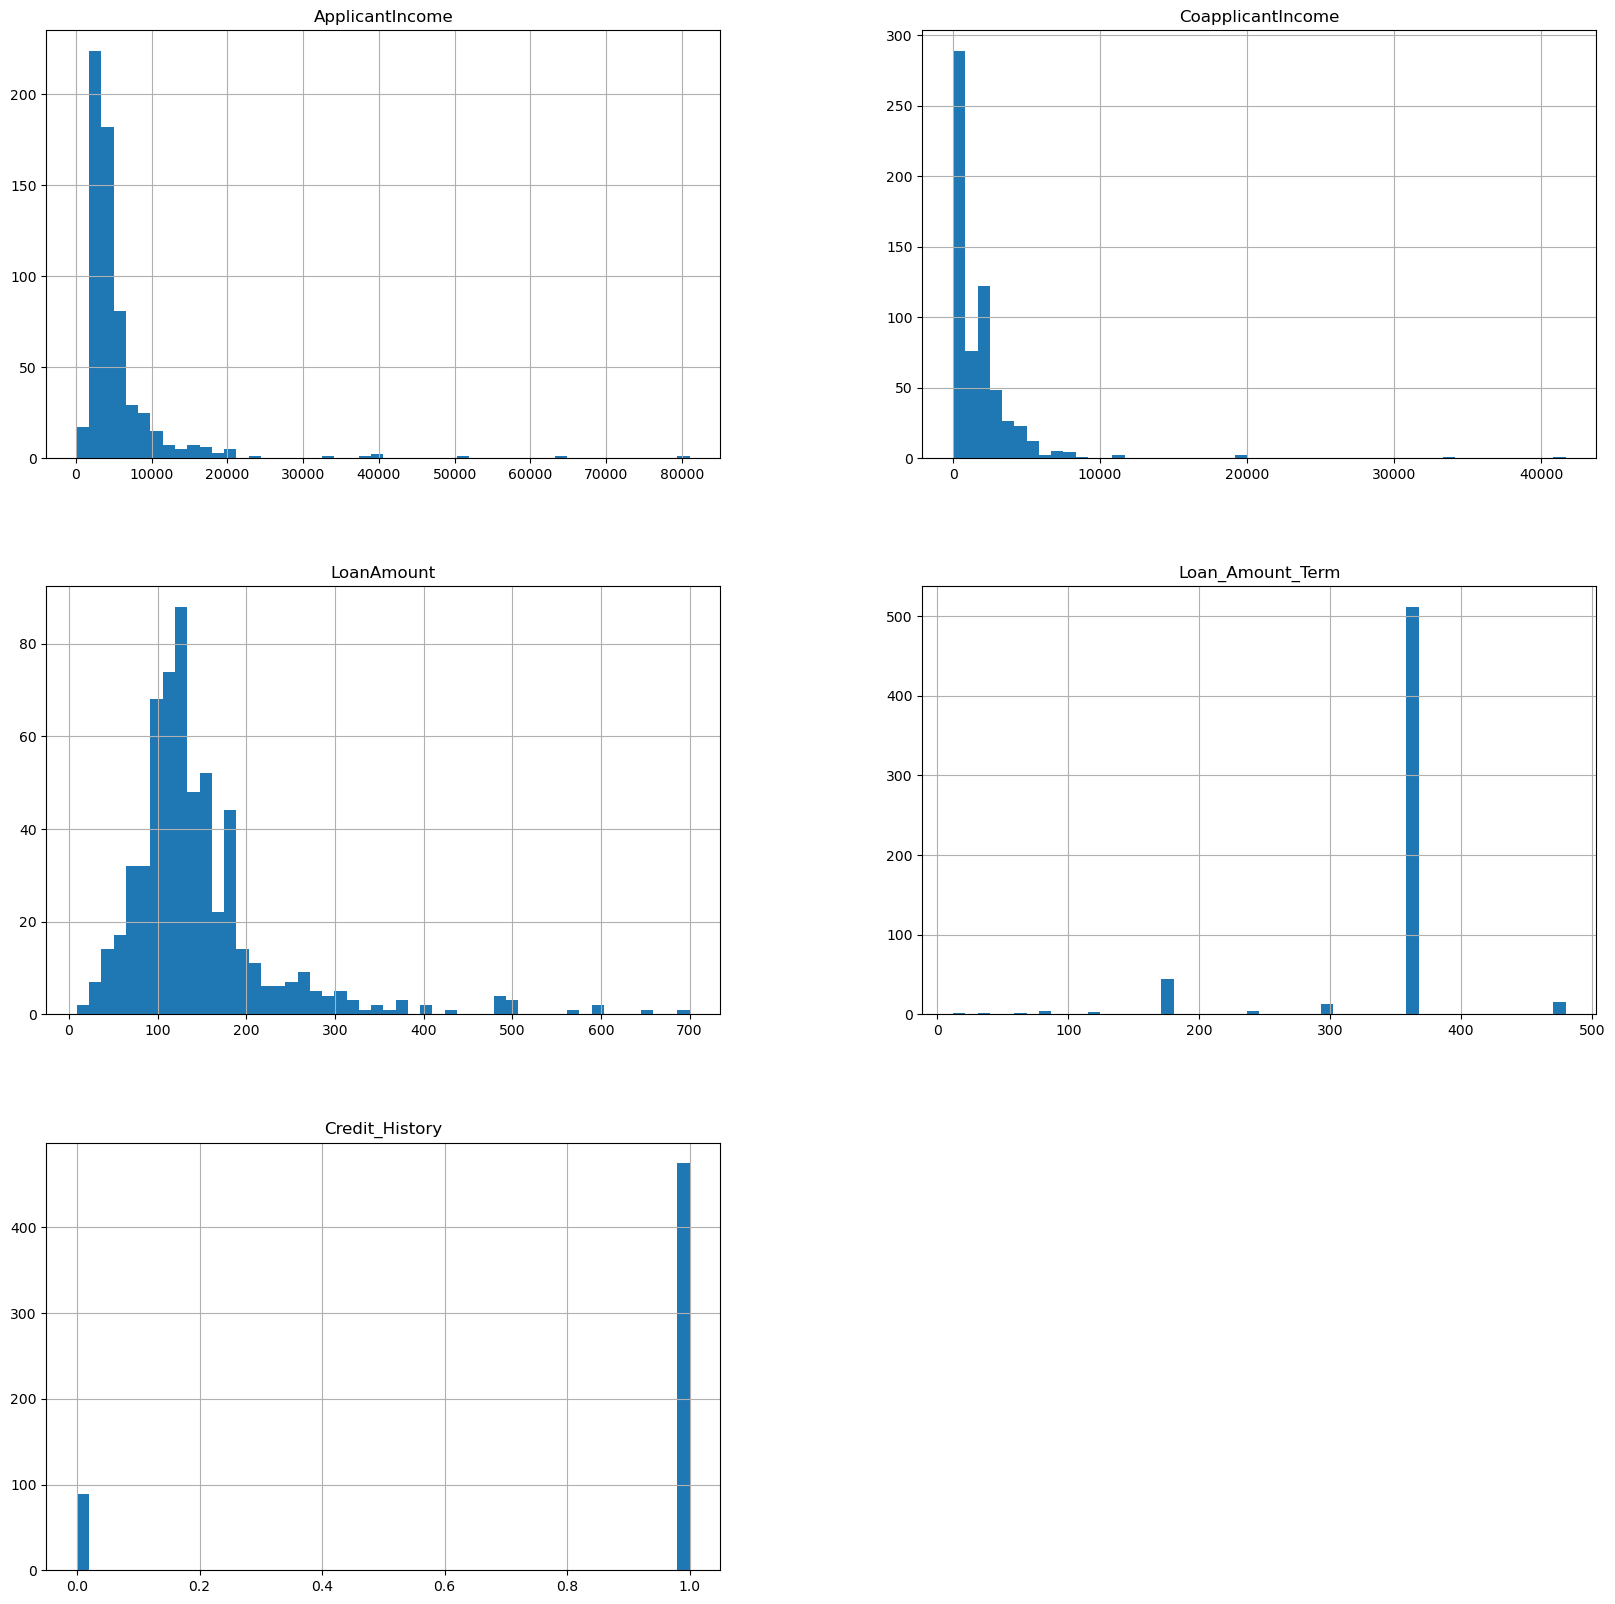

In [8]:
df.hist(figsize=(20, 20), bins=50)

In [9]:
df['Property_Area'].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

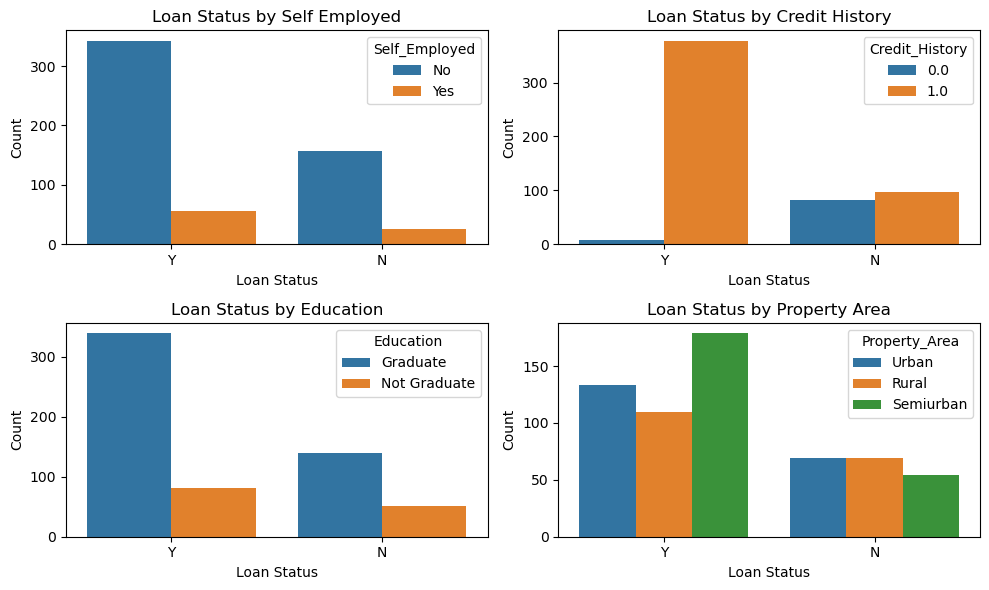

In [10]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.countplot(x='Loan_Status', data=df, hue='Self_Employed')
plt.title('Loan Status by Self Employed')
plt.xlabel('Loan Status')   
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.countplot(x='Loan_Status', data=df, hue = 'Credit_History')
plt.title('Loan Status by Credit History')  
plt.xlabel('Loan Status')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.countplot(x='Loan_Status', data = df,hue = 'Education')
plt.title('Loan Status by Education')
plt.xlabel('Loan Status')
plt.ylabel('Count')

plt.subplot(2, 2, 4)
sns.countplot(x='Loan_Status', data=df, hue='Property_Area')
plt.title('Loan Status by Property Area')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

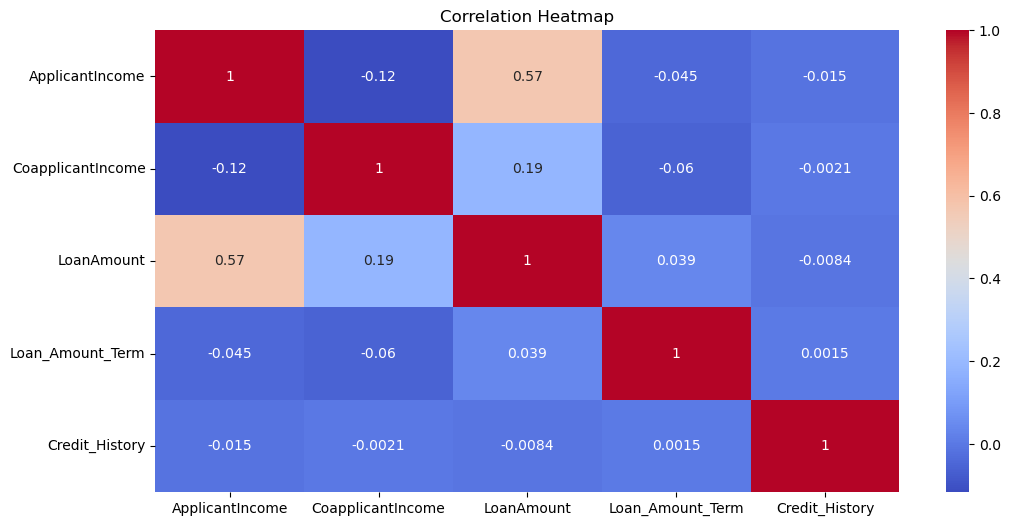

In [11]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(12, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

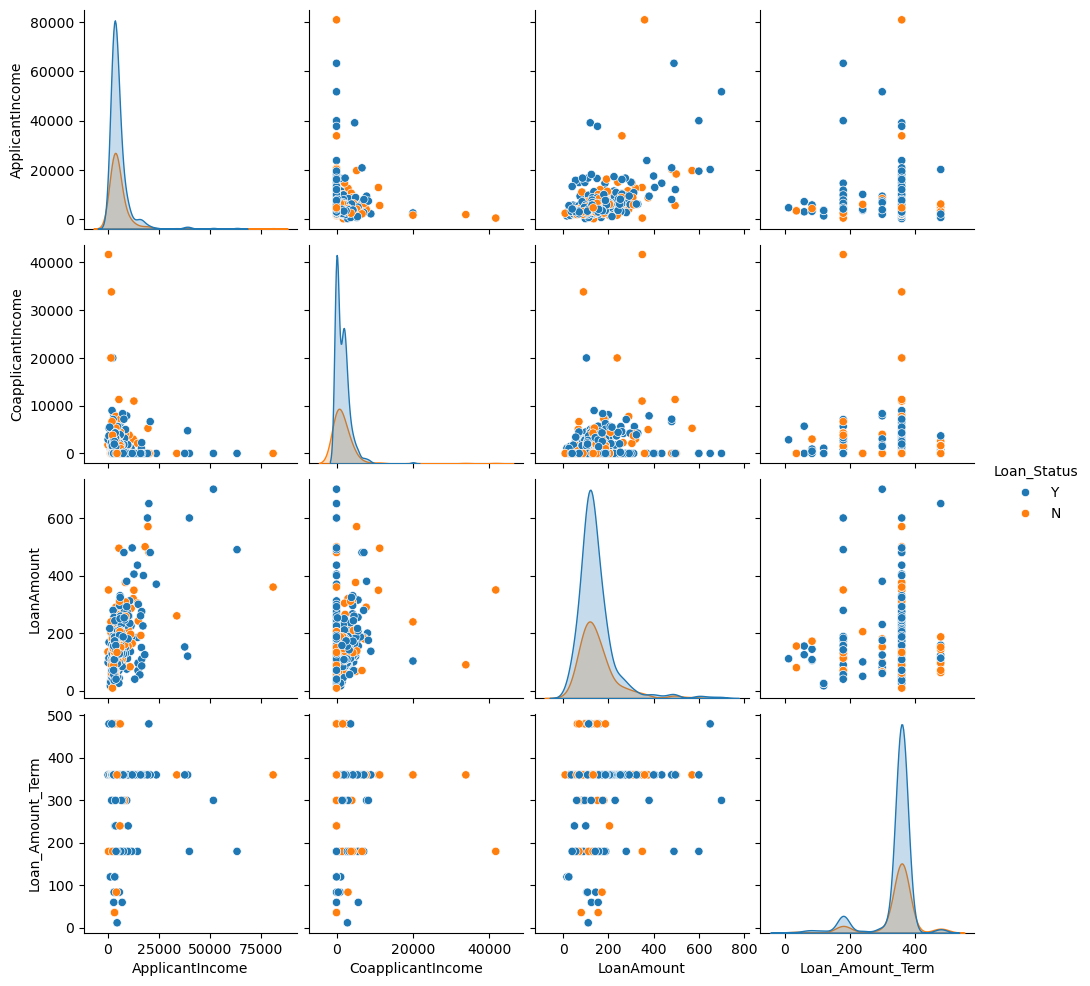

In [12]:
sns.pairplot(df, hue='Loan_Status', vars=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])
plt.show()

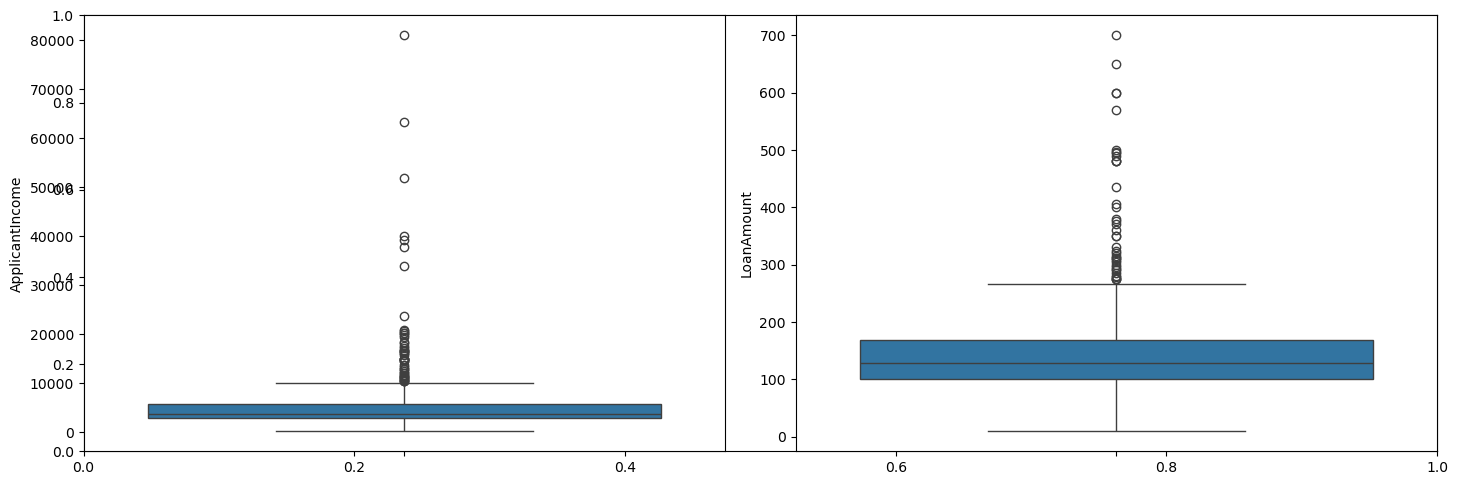

In [13]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
    plt.subplot(1, 2, i+1)
    sns.boxplot(df[col])
plt.tight_layout()
plt.show()

In [14]:
df = df[df['ApplicantIncome'] < 25000]
df = df[df['LoanAmount'] < 400000]

In [15]:
df.groupby('Gender').mean(numeric_only=True)['LoanAmount']

Gender
Female    126.697248
Male      146.924569
Name: LoanAmount, dtype: float64

In [16]:
df.groupby(['Gender','Married']).mean(numeric_only=True)['LoanAmount']

Gender  Married
Female  No         116.115385
        Yes        153.322581
Male    No         135.959677
        Yes        150.875740
Name: LoanAmount, dtype: float64

In [17]:
#feature engineering
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['EMI'] = df['LoanAmount'] / df['Loan_Amount_Term']
df['Income_to_EMI'] = df['Total_Income'] / df['EMI']

In [18]:
df['Gender'] = df['Gender'].map({'Male': 1,'Female': 0})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [19]:
location = pd.get_dummies(df['Property_Area'], drop_first=True,dtype=int)
df = pd.concat([df, location], axis=1)

In [20]:
df = df.drop('Property_Area', axis=1)
df.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,EMI,Income_to_EMI,Semiurban,Urban
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,6091.0,0.355556,17130.937500,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,3000.0,0.183333,16363.636364,0,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,4941.0,0.333333,14823.000000,0,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,6000.0,0.391667,15319.148936,0,1
5,1.0,1.0,2.0,1,1.0,5417,4196.0,267.0,360.0,1.0,1,9613.0,0.741667,12961.348315,0,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 585 entries, 1 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             573 non-null    float64
 1   Married            583 non-null    float64
 2   Dependents         572 non-null    float64
 3   Education          585 non-null    int64  
 4   Self_Employed      555 non-null    float64
 5   ApplicantIncome    585 non-null    int64  
 6   CoapplicantIncome  585 non-null    float64
 7   LoanAmount         585 non-null    float64
 8   Loan_Amount_Term   571 non-null    float64
 9   Credit_History     536 non-null    float64
 10  Loan_Status        585 non-null    int64  
 11  Total_Income       585 non-null    float64
 12  EMI                571 non-null    float64
 13  Income_to_EMI      571 non-null    float64
 14  Semiurban          585 non-null    int32  
 15  Urban              585 non-null    int32  
dtypes: float64(11), int32(2), int64

In [22]:
x = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [24]:
xtrain.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,EMI,Income_to_EMI,Semiurban,Urban
80,0.0,0.0,0.0,1,0.0,3846,0.0,111.0,360.0,1.0,3846.0,0.308333,12473.513514,1,0
460,NaN,1.0,0.0,1,1.0,2083,4083.0,160.0,360.0,NaN,6166.0,0.444444,13873.500000,1,0
225,1.0,1.0,0.0,1,0.0,3250,0.0,170.0,360.0,1.0,3250.0,0.472222,6882.352941,0,0
206,0.0,0.0,0.0,1,0.0,3244,0.0,80.0,360.0,1.0,3244.0,0.222222,14598.000000,0,1
474,1.0,0.0,2.0,1,0.0,5532,4648.0,162.0,360.0,1.0,10180.0,0.450000,22622.222222,0,0


In [25]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 468 entries, 80 to 109
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             460 non-null    float64
 1   Married            466 non-null    float64
 2   Dependents         456 non-null    float64
 3   Education          468 non-null    int64  
 4   Self_Employed      447 non-null    float64
 5   ApplicantIncome    468 non-null    int64  
 6   CoapplicantIncome  468 non-null    float64
 7   LoanAmount         468 non-null    float64
 8   Loan_Amount_Term   458 non-null    float64
 9   Credit_History     429 non-null    float64
 10  Total_Income       468 non-null    float64
 11  EMI                458 non-null    float64
 12  Income_to_EMI      458 non-null    float64
 13  Semiurban          468 non-null    int32  
 14  Urban              468 non-null    int32  
dtypes: float64(11), int32(2), int64(2)
memory usage: 54.8 KB


In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier



Random Forest - Accuracy: 0.80, F1 Score: 0.87, ROC AUC: 0.70
Confusion Matrix:
[[16 21]
 [ 2 78]]

SVM - Accuracy: 0.82, F1 Score: 0.88, ROC AUC: 0.72
Confusion Matrix:
[[16 21]
 [ 0 80]]

SGD - Accuracy: 0.71, F1 Score: 0.81, ROC AUC: 0.61
Confusion Matrix:
[[12 25]
 [ 9 71]]

GradientBoosting - Accuracy: 0.80, F1 Score: 0.87, ROC AUC: 0.70
Confusion Matrix:
[[15 22]
 [ 1 79]]

XGboost - Accuracy: 0.75, F1 Score: 0.83, ROC AUC: 0.66
Confusion Matrix:
[[15 22]
 [ 7 73]]



c:\Users\ThinkPad\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:17:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Voting Classifier - Accuracy: 0.80, F1 Score: 0.87, ROC AUC: 0.70
Confusion Matrix:
[[15 22]
 [ 1 79]]



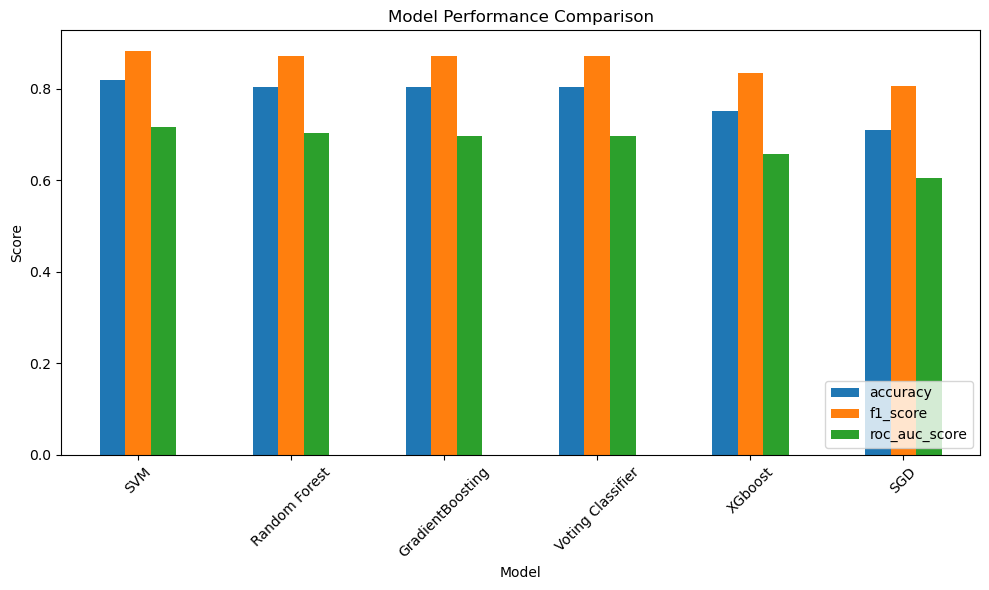

In [ ]:
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Urban', 'Semiurban']
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Dependents']
preprocessor = ColumnTransformer(
    transformers=[
        ('num',make_pipeline(
            SimpleImputer(strategy = 'median'),
            StandardScaler()), numeric_cols),
        ('bin', make_pipeline(
            SimpleImputer(strategy='most_frequent')
        ), binary_cols),
    ]


)
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42,kernel='rbf'),
    'SGD': SGDClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'XGboost': xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'Voting Classifier': VotingClassifier(estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('svm', SVC(random_state=42, kernel='rbf',probability=True)),
        ('sgd', SGDClassifier(random_state=42,loss='log_loss')),
        ('gb', GradientBoostingClassifier(random_state=42)),
        ('xgb', xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'))
    ], voting='soft', n_jobs=-1)
}
results = {}
for name, clf in classifiers.items():
   pipeline = make_pipeline(preprocessor,clf)
   pipeline.fit(xtrain, ytrain)
   ypred = pipeline.predict(xtest)
   results[name] = {
      'accuracy': accuracy_score(ytest, ypred),
      'f1_score': f1_score(ytest, ypred),
      'roc_auc_score':roc_auc_score(ytest, ypred),
      'confusion_matrix': confusion_matrix(ytest, ypred)
   }
   print(f"{name} - Accuracy: {results[name]['accuracy']:.2f}, F1 Score: {results[name]['f1_score']:.2f}, ROC AUC: {results[name]['roc_auc_score']:.2f}")
   print(f"Confusion Matrix:\n{results[name]['confusion_matrix']}\n")
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='roc_auc_score', ascending=False)
results_df[['accuracy', 'f1_score', 'roc_auc_score']].plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')   
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()

In [41]:
xtrain_imputed = preprocessor.fit_transform(xtrain)
xtest_imputed = preprocessor.transform(xtest)


In [44]:
ytrain.isnull().sum()

0

In [45]:
scores = cross_val_score(SVC(random_state=42, kernel='rbf'), xtrain_imputed, ytrain, cv=5, scoring='accuracy')
print(scores)
print("Mean accuracy:", scores.mean())


[0.82978723 0.78723404 0.75531915 0.8172043  0.8172043 ]
Mean accuracy: 0.8013498055364906


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}
Best cross-validation score: 0.8163349347975292

Test set performance:
Accuracy: 0.812
F1 Score: 0.879
ROC AUC Score: 0.705

Confusion Matrix:
[[15 22]
 [ 0 80]]


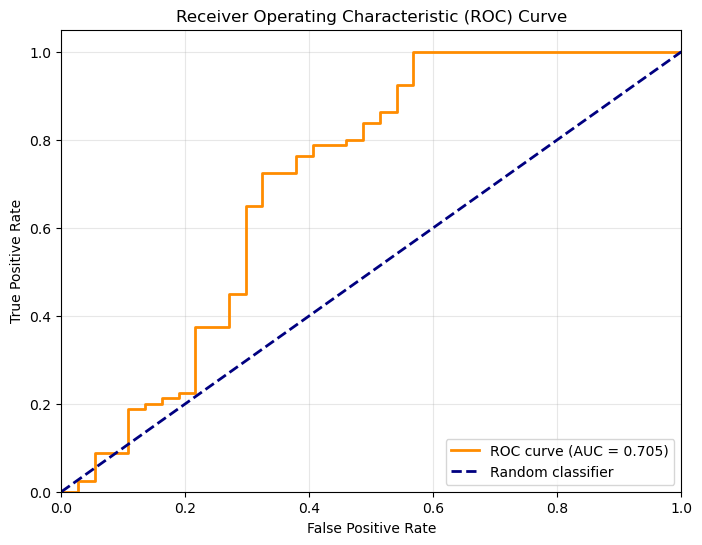

In [32]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc


svm_pipeline = make_pipeline(
    preprocessor,
    SVC(random_state=42, probability=True)  
)

param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 0.1, 0.01],
    'svc__kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=2
)

grid_search.fit(xtrain, ytrain)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get predictions and probabilities
y_pred = grid_search.predict(xtest)
y_pred_proba = grid_search.predict_proba(xtest)[:, 1]  

# Calculate performance metrics
print("\nTest set performance:")
print(f"Accuracy: {accuracy_score(ytest, y_pred):.3f}")
print(f"F1 Score: {f1_score(ytest, y_pred):.3f}")
print(f"ROC AUC Score: {roc_auc_score(ytest, y_pred_proba):.3f}")  
print("\nConfusion Matrix:")
print(confusion_matrix(ytest, y_pred))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(ytest, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

